### NLP-Explore Exercises
Do your work for this exercise in a file named ```explore```.

**1.  Spam Data**

**a. Load the spam data set.**

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import acquire, prepare
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from env import user, password, host

In [2]:
# acquire spam_db

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

# write spam_db to dataframe
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:

#define additional stopwords to use when cleaning text
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    '''
    A simple function to cleanup text data
    '''
    #create lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #define stopwords
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    #normalize/clean text split words
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    
    # apply lemmatizer to all words in corpus
    return [wnl.lemmatize(word) for word in words if word not in stopwords]



In [4]:
#use clean function to create three sets of data: spam, ham and all and rejoin lemmatized words to one string
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

**b.  Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?**

In [5]:
#finding most common bigrams in spam
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

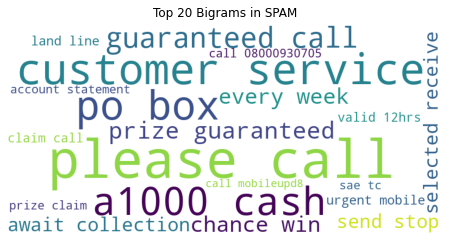

In [6]:
# Create word cloud of top 20 spam bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in SPAM')
plt.show()

In [7]:
#finding most common bigrams in ham
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

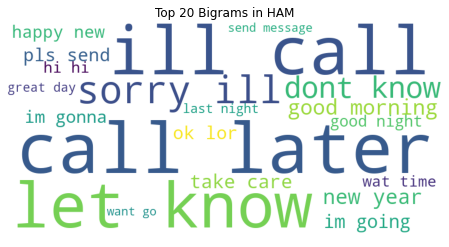

In [8]:
# Create word cloud of top 20 bigrams in HAM
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in HAM')
plt.show()

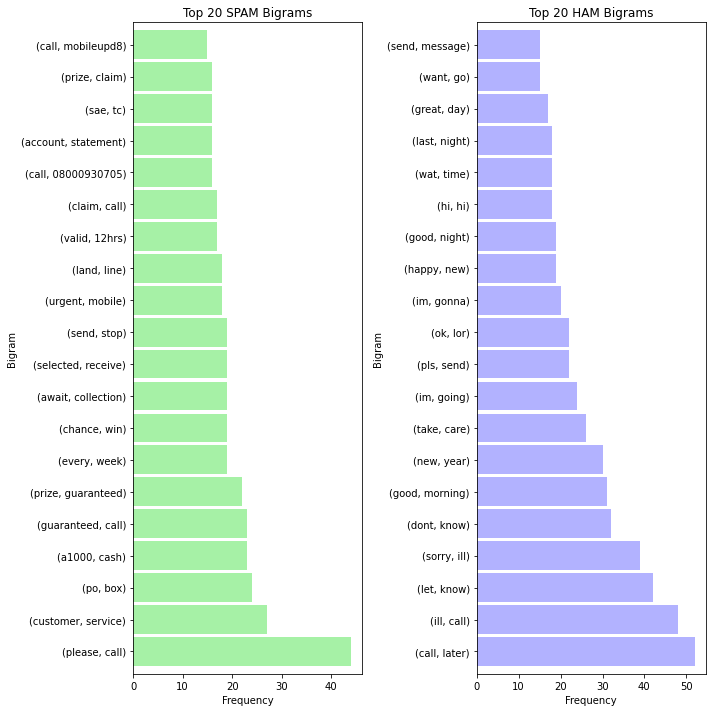

In [9]:
#Create bar plots comparing top 20 bigrams in spam and ham
plt.subplot(121)
top_20_spam_bigrams.plot.barh(color='lightgreen', width=.9, figsize=(10, 10), alpha=.8)
plt.title('Top 20 SPAM Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
top_20_ham_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 HAM Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

**c.  Is there any overlap in the bigrams for the spam data and the ham data?**

In [10]:
#create dataframes from series
spam_bigrams = pd.DataFrame(nltk.ngrams(spam_words, 2))
ham_bigrams = pd.DataFrame(nltk.ngrams(ham_words, 2))

In [11]:
# merge spam and ham dataframes (inner join) to find common bigrams
common_bigrams = spam_bigrams.merge(ham_bigrams, how = 'inner' ,indicator=False)
common_bigrams = common_bigrams.value_counts()

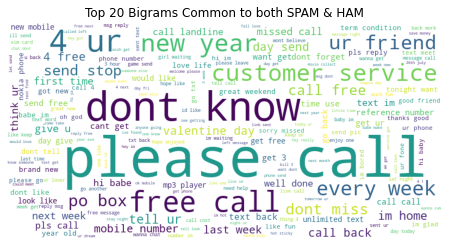

In [12]:
# Create word cloud of top 20 bigrams that occur in both spam and ham
data = {k[0] + ' ' + k[1]: v for k, v in common_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams Common to both SPAM & HAM')
plt.show()

**d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.**

In [13]:
#finding most common trigrams in spam
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(2003, account, statement)    13
dtype: int64

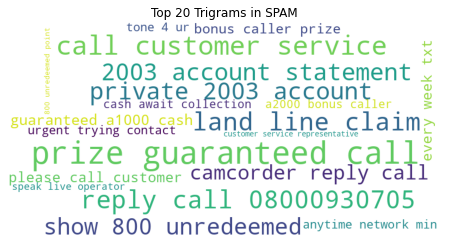

In [14]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Trigrams in SPAM')
plt.show()

In [15]:
#finding most common trigrams in ham
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(right, pls, send)      12
dtype: int64

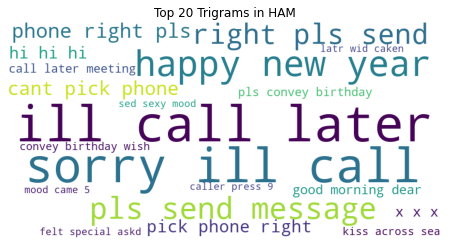

In [16]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Trigrams in HAM')
plt.show()

**2. Explore the blog articles using the techniques discussed in the exploration lesson.**

In [17]:
# acquire the dataframe of codeup blog articles
blog = acquire.acquire_codeup_blog()
blog.head()

,title,published_date,blog_image,content
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...


In [18]:
# apply clean function to content column - clean, split, lemmatize each word in corpus 
all_words = clean(' '.join(blog.content))

In [19]:
# check frequency of all words
all_freq = pd.Series(all_words).value_counts()
all_freq

data          75
science       26
learning      20
company       20
job           14
              ..
15             1
outlined       1
accessible     1
cue            1
dozen          1
Length: 795, dtype: int64

In [20]:
#finding most common bigrams in blog content
bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

bigrams

(data, science)            26
(machine, learning)        14
(data, scientist)          13
(job, fair)                 9
(via, giphy)                5
(san, antonio)              4
(bootcamp, model)           4
(busted, via)               4
(tech, job)                 4
(giphy, myth)               4
(intelligence, data)        4
(iron, yard)                3
(big, data)                 3
(25, seat)                  3
(big, education)            3
(career, accelerator)       3
(sa, tech)                  3
(programming, bootcamp)     3
(science, data)             3
(seat, available)           3
dtype: int64

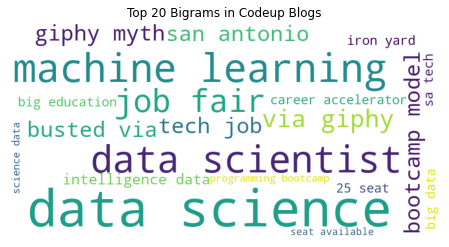

In [21]:
# plot world cloud of top 20 bigrams in blogs

data = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in Codeup Blogs')
plt.show()

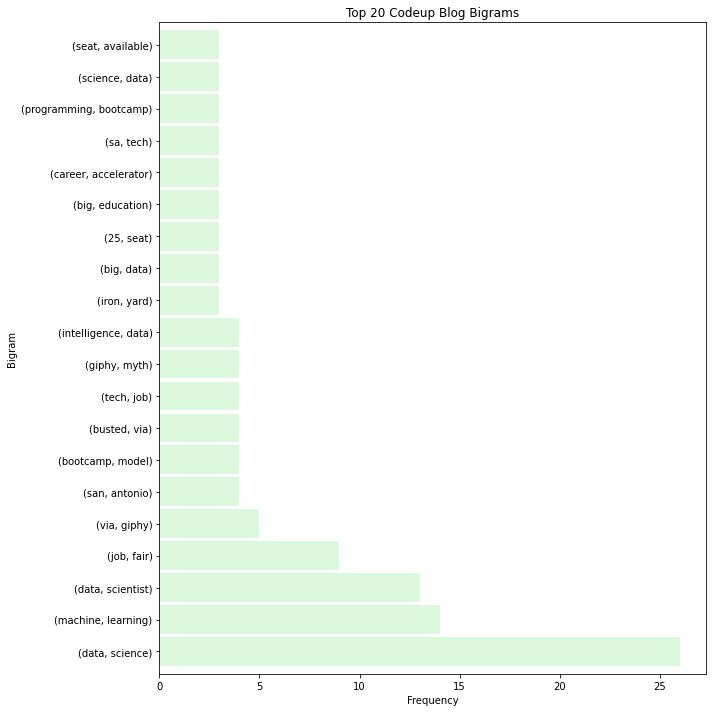

In [22]:
#Create bar plot of top 20 bigrams in Codeup blogs
bigrams.plot.barh(color='lightgreen', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 Codeup Blog Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

**3. Explore the news articles using the techniques discussed in the exploration lesson. Use the ```category``` variable when exploring.**

In [23]:
# acquire the dataframe of news articles 
news = acquire.acquire_news_articles()
news.head()

,title,content,category
0,Global task force of 40 US firms' CEOs launch ...,A global task force of CEOs of top 40 American...,business
1,"IndiGo airlifts 2,717 oxygen concentrators fro...",IndiGo on Wednesday said that it has airlifted...,business
2,"Citi pledges additional ₹200 cr aid for India,...",Citigroup has said it'll spend an additional ₹...,business
3,2nd COVID-19 wave has impacted India's nascent...,Finance Minister Nirmala Sitharaman said that ...,business
4,"RBI's ₹50,000 cr liquidity support a welcome m...",Apollo Hospitals Group Joint MD Dr Sangita Red...,business


In [24]:
#use clean function to create a word set for each category and all and rejoin lemmatized words to one string
world_words = clean(' '.join(news[news.category == 'world'].content))
entertainment_words = clean(' '.join(news[news.category == 'entertainment'].content))
technology_words = clean(' '.join(news[news.category == 'technology'].content))
business_words = clean(' '.join(news[news.category == 'business'].content))
sports_words = clean(' '.join(news[news.category == 'sports'].content))
science_words = clean(' '.join(news[news.category == 'science'].content))
all_words = clean(' '.join(news.content))

In [25]:
# check frequency of all words
world_freq = pd.Series(world_words).value_counts()
entertainment_freq = pd.Series(entertainment_words).value_counts()
technology_freq = pd.Series(technology_words).value_counts()
business_freq = pd.Series(business_words).value_counts()
sports_freq = pd.Series(sports_words).value_counts()
science_freq = pd.Series(science_words).value_counts()
all_freq = pd.Series(all_words).value_counts()
science_freq

space         22
spacex        13
said          11
station       11
first         10
              ..
pilot          1
wide           1
pm             1
conference     1
there          1
Length: 552, dtype: int64

In [26]:
#finding most common bigrams in news articles
world_bigrams = (pd.Series(nltk.ngrams(world_words, 2))
                      .value_counts()
                      .head(20))
entertainment_bigrams = (pd.Series(nltk.ngrams(entertainment_words, 2))
                      .value_counts()
                      .head(20))
technology_bigrams = (pd.Series(nltk.ngrams(technology_words, 2))
                      .value_counts()
                      .head(20))
business_bigrams = (pd.Series(nltk.ngrams(business_words, 2))
                      .value_counts()
                      .head(20))
sports_bigrams = (pd.Series(nltk.ngrams(sports_words, 2))
                      .value_counts()
                      .head(20))
science_bigrams = (pd.Series(nltk.ngrams(science_words, 2))
                      .value_counts()
                      .head(20))
all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))
all_bigrams.head()

(tested, positive)    10
(space, station)       9
(u, president)         8
(former, u)            8
(social, medium)       7
dtype: int64

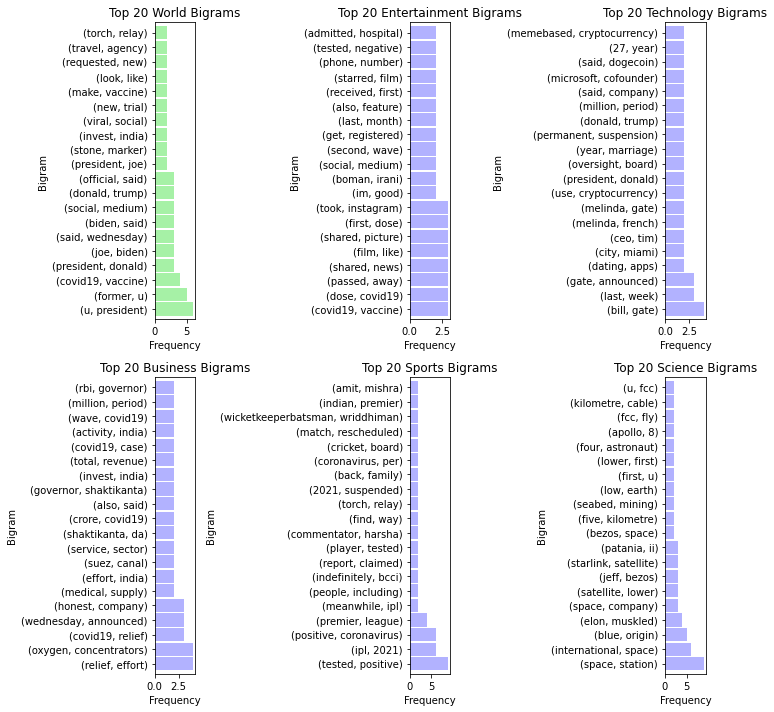

In [27]:
#Create bar plots comparing top 20 bigrams in each article category and 
plt.subplot(231)
world_bigrams.plot.barh(color='lightgreen', width=.9, figsize=(10, 10), alpha=.8)
plt.title('Top 20 World Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(232)
entertainment_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 Entertainment Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(233)
technology_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 Technology Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(234)
business_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 Business Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(235)
sports_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 Sports Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(236)
science_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.3)
plt.title('Top 20 Science Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

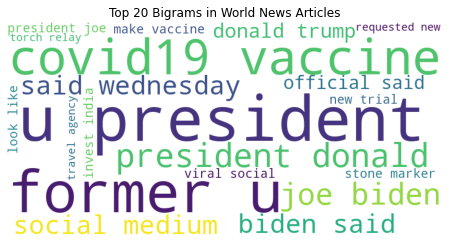

In [28]:
# plot world cloud of top 20 bigrams in world articles

data = {k[0] + ' ' + k[1]: v for k, v in world_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in World News Articles')
plt.show()

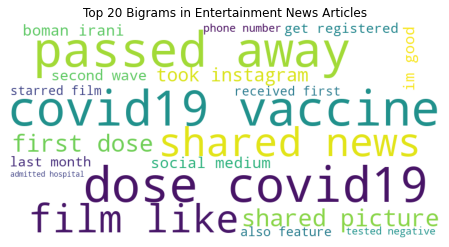

In [29]:
# plot world cloud of top 20 bigrams in entertainment articles

data = {k[0] + ' ' + k[1]: v for k, v in entertainment_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in Entertainment News Articles')
plt.show()

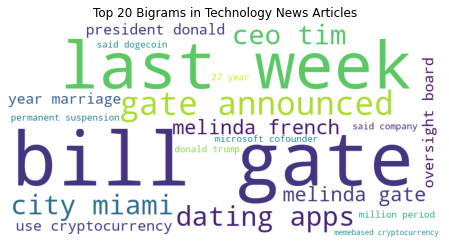

In [30]:
# plot world cloud of top 20 bigrams in technology articles

data = {k[0] + ' ' + k[1]: v for k, v in technology_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in Technology News Articles')
plt.show()

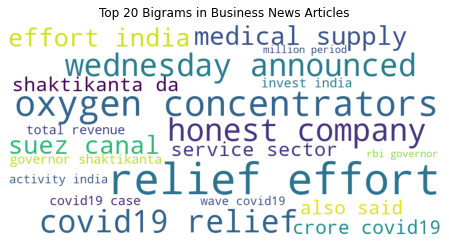

In [31]:
# plot world cloud of top 20 bigrams in business articles

data = {k[0] + ' ' + k[1]: v for k, v in business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in Business News Articles')
plt.show()

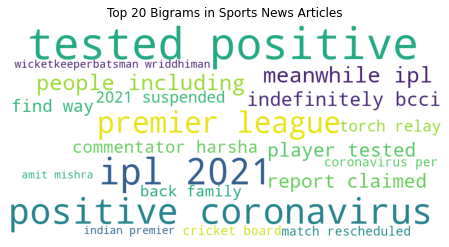

In [32]:
# plot world cloud of top 20 bigrams in sports articles

data = {k[0] + ' ' + k[1]: v for k, v in sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in Sports News Articles')
plt.show()

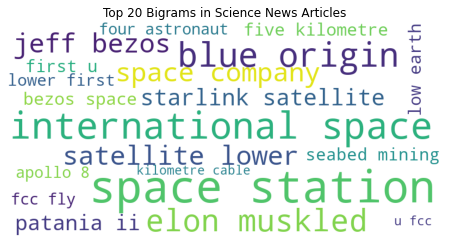

In [33]:
# plot world cloud of top 20 bigrams in science articles

data = {k[0] + ' ' + k[1]: v for k, v in science_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Bigrams in Science News Articles')
plt.show()

In [34]:
#finding most common trigrams in news articles
world_trigrams = (pd.Series(nltk.ngrams(world_words, 3))
                      .value_counts()
                      .head(20))
entertainment_trigrams = (pd.Series(nltk.ngrams(entertainment_words, 3))
                      .value_counts()
                      .head(20))
technology_trigrams = (pd.Series(nltk.ngrams(technology_words, 3))
                      .value_counts()
                      .head(20))
business_trigrams = (pd.Series(nltk.ngrams(business_words, 3))
                      .value_counts()
                      .head(20))
sports_trigrams = (pd.Series(nltk.ngrams(sports_words, 3))
                      .value_counts()
                      .head(20))
science_trigrams = (pd.Series(nltk.ngrams(science_words, 3))
                      .value_counts()
                      .head(20))
all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))
all_trigrams.head()

(international, space, station)    6
(former, u, president)             6
(president, donald, trump)         5
(u, president, donald)             5
(tested, positive, coronavirus)    5
dtype: int64

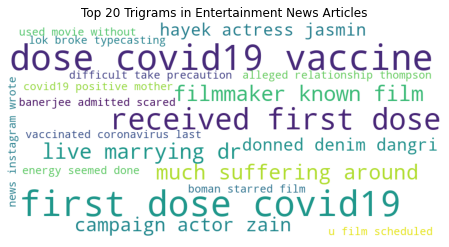

In [35]:
# plot world cloud of top 20 trigrams in entertainment articles

data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in entertainment_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Trigrams in Entertainment News Articles')
plt.show()

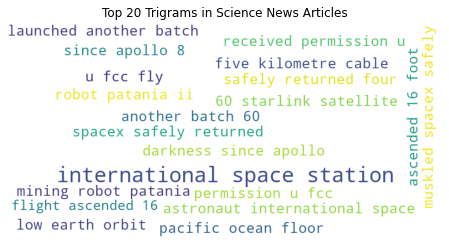

In [36]:
# plot world cloud of top 20 trigrams in science articles

data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in science_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Top 20 Trigrams in Science News Articles')
plt.show()